In [2]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [3]:
house = load_boston()

D:\exercise_w\vippython\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [4]:
print(house.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
x = house.data
y = house.target
df = pd.DataFrame(x, columns=house.feature_names)
df['Target'] = pd.DataFrame(y, columns=['Target'])
df.shape

(506, 14)

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

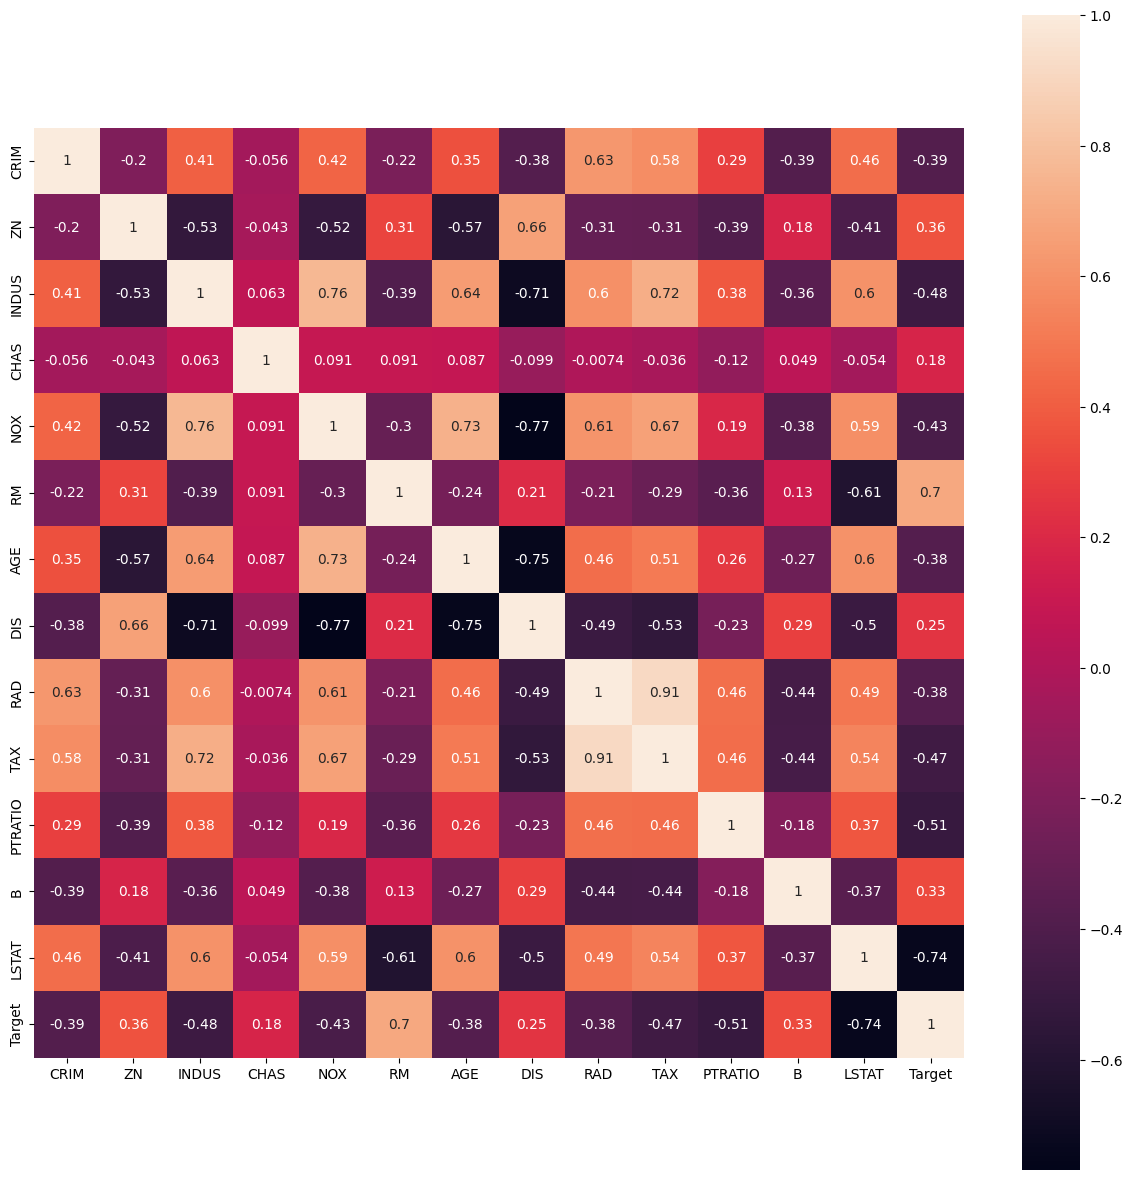

In [8]:
plt.figure(figsize=(15,15))
# 画热力图，数值为两个变量之间的相关系数
p=sns.heatmap(df.corr(), annot=True, square=True)

In [9]:
# 数据标准化
ss = StandardScaler()
x = ss.fit_transform(x)

x[:3]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ]])

In [10]:
from sklearn.model_selection import train_test_split
# 切分数据集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# SVR linear

In [11]:
linear_model=SVR(kernel='linear')
linear_model.fit(x,y)

SVR(kernel='linear')

In [12]:
linear_model.support_vectors_

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [13]:
linear_model.score(x_train,y_train)

0.6911462269732593

In [14]:
linear_model.score(x_test,y_test)

0.7465827611837945

In [25]:
linear_predictions = linear_model.predict(x_test)
print('linear R-squared =',r2_score(y_test,linear_predictions))

linear R-squared = 0.7465827611837945


# SVR rbf

In [16]:
rbf_model=SVR(kernel='rbf')
rbf_model.fit(x,y)

SVR()

In [17]:
rbf_model.score(x_train,y_train)

0.6811931219119505

In [27]:
rbf_predictions = rbf_model.predict(x_test)
print('rbf R-squared =',r2_score(y_test,rbf_predictions))

rbf R-squared = 0.7509284176518978


# SVR poly

In [19]:
poly_model=SVR(kernel='poly')
poly_model.fit(x,y)

SVR(kernel='poly')

In [20]:
poly_model.score(x_train,y_train)

0.684276266123981

In [28]:
poly_predictions = poly_model.predict(x_test)
print('poly R-squared =',r2_score(y_test,poly_predictions))

poly R-squared = 0.7164989516638123


# SVR sigmoid

In [22]:
sigmoid_model=SVR(kernel='sigmoid')
sigmoid_model.fit(x,y)

SVR(kernel='sigmoid')

In [23]:
sigmoid_model.score(x_train,y_train)

0.3938932218628324

In [29]:
sigmoid_predictions = sigmoid_model.predict(x_test)
print('sigmoid R-squared =',r2_score(y_test,sigmoid_predictions))

sigmoid R-squared = 0.5282214332635264


完